# Atlanta Crime - KMeans

## Description

In this part of the project, we will use K-Means clustering to calculate distance from each cluster for each data point. Then, we will use these distances as additional features for our supervised model.

## Import Libraries

In [1]:
import sklearn as sk
from sklearn import cluster
from sklearn import neighbors
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

## Date & Time Functions

In [2]:
def print_month(row):
    cur_date = row['Occur Date']
    year, month, day = (int(x) for x in cur_date.split('-'))    
    month = int(month)
    return month

def day_of_month(row):
    cur_date = row['Occur Date']
    year, month, day = (int(x) for x in cur_date.split('-'))    
    day = int(day)
    return day

def year(row):
    cur_date = row['Occur Date']
    year, month, day = (int(x) for x in cur_date.split('-'))    
    year = int(year)
    return year

## Load Data

In [3]:
### 2009-2018 clean
data = pd.read_csv("data/Supervised_Algs/cobra-clean2009.csv") #, sep=',', header=0, engine='python', usecols = lambda column : column in ["Latitude", "Longitude"])
#Other datasets
#data = pd.read_csv("cobra-clean.csv", sep=',', header=0, engine='python', usecols = lambda column : column in ["Latitude", "Longitude"])

## Data Manipulation

In [4]:
#Extract date features
data['Year'] = data.apply(lambda row: year(row), axis=1)
data['Month'] = data.apply(lambda row: print_month(row), axis=1)
data['Day of Month'] = data.apply(lambda row: day_of_month(row), axis=1)

#Drop unneeded features
data = data.drop(['Occur Date','Beat','Location','UCR #','Neighborhood','Shift Occurence','UCR Literal','NPU'],axis=1)

X = data.to_numpy()

head_tail = data.iloc[np.r_[0:10, -10:0]]
head_tail

,Occur Time,Longitude,Latitude,Day of Week,Crime Category,Year,Month,Day of Month
0,1145,-84.49328,33.68845,3,4,2009,1,1
1,1330,-84.39201,33.75320,3,4,2009,1,1
2,1450,-84.36212,33.84676,3,4,2009,1,1
3,1600,-84.49773,33.68677,3,4,2009,1,1
4,1645,-84.34875,33.75786,3,4,2009,1,1
5,1740,-84.45385,33.70827,3,4,2009,1,1
6,1627,-84.36212,33.84676,3,4,2009,1,1
7,815,-84.48742,33.68841,3,4,2009,1,1
8,100,-84.43612,33.71464,3,4,2009,1,1
9,130,-84.34595,33.76675,3,4,2009,1,1


## Compute KMeans

In [5]:
k_values = np.array([3,10])
for k in k_values:
    km = sk.cluster.KMeans(n_clusters = k, init='random',n_init=1,max_iter=300,tol=1e-04,random_state=0)
    y_km = km.fit_predict(X)

    centers = km.cluster_centers_
    labels = km.labels_
    inertia = km.inertia_
    print('Number of Clusters = ',k)
    print('--------------------------------------------------------------')
    print('Cluster Centers: ',centers)
    print('Labels: ',labels)
    print('Unique Labels: ',np.unique(labels))
    #plt.scatter(X[:, 0], X[:, 1], c=y_km, s=50, cmap='viridis')
    #plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=1);
    print('--------------------------------------------------------------')

Number of Clusters =  3
--------------------------------------------------------------
Cluster Centers:  [[1959.88946245  -84.39855441   33.76097845    2.98677895    3.42704922
  2013.17597251    6.68915889   15.74980161]
 [1186.22667212  -84.40129124   33.75895364    2.87743831    3.47813605
  2013.09932887    6.68245941   15.67546295]
 [ 277.6711504   -84.40104865   33.75448113    3.2257238     3.23269646
  2013.11579005    6.65294096   15.66020643]]
Labels:  [1 1 1 ... 0 2 1]
Unique Labels:  [0 1 2]
--------------------------------------------------------------
Number of Clusters =  10
--------------------------------------------------------------
Cluster Centers:  [[2106.00501635  -84.39918063   33.7594156     2.99318002    3.32262428
  2013.20009018    6.70606471   15.7851426 ]
 [1226.23131816  -84.40047917   33.7597505     2.93790464    3.50723679
  2013.10551607    6.69171007   15.62834863]
 [ 985.86214945  -84.40198848   33.75743218    2.79050124    3.44804208
  2013.05460675  

## Calculate KMeans Distances

In [10]:
def k_mean_distance(data, cx, cy, i_centroid, cluster_labels):
        distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x, y) in data[cluster_labels == i_centroid]]
        return distances
clusters=km.fit_predict(data)
centroids = km.cluster_centers_

distances = []
for i, (cx, cy) in enumerate(centroids):
    mean_distance = k_mean_distance(data, cx, cy, i, clusters)
    distances.append(mean_distance)

print(distances)

ValueError: too many values to unpack (expected 2)

## K Means Elbow Method

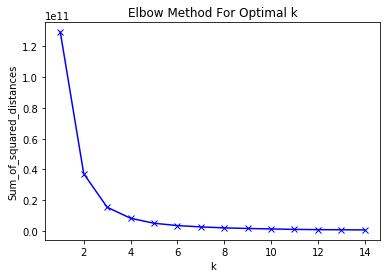

In [6]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = sk.cluster.KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()